<a href="https://colab.research.google.com/github/Rushi-Sh/Team_Zeta/blob/main/Team_Zeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Analytics And Visualization of the DEM Files**

In [ ]:
!pip install numpy pandas geopandas rasterio matplotlib
!pip install pyngrok
!pip install torch torchvision torchaudio
!pip install streamlit
!pip install plotly
!pip install folium
!pip install streamlit-option-menu
!pip install pillow
!pip install rasterio
!pip install streamlit-shadcn-ui
!pip install -U langchain-groq

## **CNN Model Implementation**

In [ ]:
# GPU detection code

import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available and will be used.")
    print(f"Device name: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU.")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/flood/archive (1).zip" -d "/content/drive/MyDrive/flood"

unzip:  cannot find or open /content/drive/MyDrive/flood/archive (1).zip, /content/drive/MyDrive/flood/archive (1).zip.zip or /content/drive/MyDrive/flood/archive (1).zip.ZIP.


In [ ]:
# # importing ResNet Model Pretrained Version

# model = models.resnet50(pretrained=True)
# model1 = models.vgg16(pretrained=True)
# model3 = models.densenet121(pretrained=True)
# model4 = models.efficientnet_b0(pretrained=True)
# model5 = models.mobilenet_v2(pretrained=True)

# **Streamlit GUI Implementation**

In [ ]:
import folium
from google.colab import files

def create_folium_map():
    m = folium.Map(
        location=[9.9312, 76.2673],
        zoom_start=10,
        tiles='https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png',
        attr='Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL.'
    )

    folium.Marker(
        location=[9.9312, 76.2673],
        popup='Kochi',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

    map_html = m._repr_html_()
    with open('map_of_kochi.html', 'w') as f:
        f.write(map_html)
    return map_html

map_html = create_folium_map()

files.download('map_of_kochi.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%writefile map.py


import streamlit as st
import folium
import streamlit.components.v1 as components
import io
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from scipy.ndimage import sobel
from streamlit_option_menu import option_menu
import pandas as pd
import pydeck as pdk

df = pd.read_csv("/content/historical.csv")

def create_folium_map():
    m = folium.Map(
        location=[9.9312, 76.2673],
        zoom_start=10,
        tiles='https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png',
        attr='Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL.'
    )

    folium.Marker(
        location=[9.9312, 76.2673],
        popup='Kochi',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

    return m._repr_html_()

def display_matplotlib_plot(image_path):

    with rasterio.open(image_path) as src:

        dem_array = src.read(1)

        no_data_value = src.nodata
        if no_data_value is not None:
            dem_array = np.where(dem_array == no_data_value, np.nan, dem_array)

        with rasterio.open('/content/drive/MyDrive/sampleDEM.tif') as src:

          dem_array = src.read(1)

          nodata = src.nodata

    if nodata is not None:

        dem_array = np.where(dem_array == nodata, np.nan, dem_array)

        plt.figure(figsize=(10, 6))
        plt.imshow(dem_array, cmap='terrain', interpolation='none')
        plt.colorbar(label='Elevation (meters)')
        plt.title('Digital Elevation Model')
        plt.xlabel('Pixel')
        plt.ylabel('Pixel')
        plt.show()

        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        return buf

def show_map():
    st.title("Satellite Map of Kochi")

    tiff_file_path = '/content/drive/MyDrive/sampleDEM.tif'

    selected1 = option_menu(
            menu_title=None,
            options=["Map", "Slope Map"],
            icons=["map", "bar-chart"],
            menu_icon="cast",
            default_index=0,
            orientation="horizontal",

        )

    if selected1 == "Map":
      # Display Folium map
      map_html = create_folium_map()
      components.html(map_html, height=500)

      # Display Pydeck map with rainfall data
      st.pydeck_chart(pdk.Deck(
          initial_view_state=pdk.ViewState(
          latitude=9.9656,
          longitude=76.2673,
          zoom=11,
          pitch=50
          ),
          layers=[
              pdk.Layer(
                    'ScatterplotLayer',
                    data=df,
                    get_position=['lon', 'lat'],
                    get_color='[255, 0, 0, 140]',
                    get_radius='rainfall',
                    radius_scale=0.05,
                    radius_min_pixels=5,
                    radius_max_pixels=100,
                    pickable=True
                ),
            ]
        ))
      st.write("The map displays rainfall data for Kochi, Kerala. Each point represents a rainfall measurement, with size and color intensity indicating the amount of rainfall.")

    elif selected1 == "Slope Map":
        plot_buffer = display_matplotlib_plot(tiff_file_path)
        st.image(plot_buffer, caption='Slope Map', use_column_width=True)


Overwriting map.py


In [ ]:
%%writefile home.py
import streamlit as st

def show_home():
  st.title("Home")
  st.write("Team Zeta")

Overwriting home.py


In [ ]:
%%writefile analytics.py
import streamlit as st
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import sobel
import io
from streamlit_option_menu import option_menu
import pandas as pd


def perform_analysis(dem_file):

    with rasterio.open(dem_file) as dem:
        dem_array = dem.read(1)
        no_data_value = dem.nodata
        if no_data_value is not None:
            dem_array = np.where(dem_array == no_data_value, np.nan, dem_array)

        dem_mean = np.nanmean(dem_array)
        standard_deviation = np.nanstd(dem_array)
        max_elevation = np.nanmax(dem_array)
        min_elevation = np.nanmin(dem_array)
        median_value = np.median(dem_array)
        variance_value = np.var(dem_array)
        range_value = np.ptp(dem_array)
        quartiles = np.percentile(dem_array, [25, 50, 75])
        iqr_value = quartiles[2] - quartiles[0]
        skewness_value = (3 * (dem_mean - median_value)) / standard_deviation
        kurtosis_value = (np.mean((dem_array - dem_mean)**4)) / (standard_deviation**4) - 3


        dx = sobel(dem_array, axis=0, mode='nearest')
        dy = sobel(dem_array, axis=1, mode='nearest')
        valid_mask = np.isfinite(dem_array) & (dem_array != 0)
        dx[~valid_mask] = 0
        dy[~valid_mask] = 0
        slope = np.arctan(np.sqrt(dx**2 + dy**2)) * (180 / np.pi)
        valid_slope = np.where(valid_mask, slope, np.nan)

        return dem_mean, standard_deviation, max_elevation, min_elevation, valid_slope,median_value, variance_value, range_value, iqr_value, skewness_value, kurtosis_value

def historical_analysis(csv_file):
  df = pd.read_csv(csv_file)

  df = df.head(100)

  st.line_chart(df[['time', 'temperature', 'rain']].set_index('time'))

  st.subheader("Temperature vs Time")
  st.bar_chart(df[['time', 'temperature']].set_index('time'),color="#FF9100")

  st.subheader("Rain vs Time")
  st.bar_chart(df[['time', 'rain']].set_index('time'),color="#F5004F")

  plt.xticks(rotation=90)
  plt.tight_layout()


def show_analytics():
    st.title("DEM Analysis and Slope Map")

    uploaded_file = "/content/drive/MyDrive/sampleDEM.tif"

    selected2 = option_menu(
            menu_title=None,
            options=["DEM", "Historical"],
            menu_icon="cast",
            default_index=0,
            orientation="horizontal",
        )

    if uploaded_file is not None:

        dem_mean, standard_deviation, max_elevation, min_elevation, valid_slope,median_value, variance_value, range_value, iqr_value, skewness_value, kurtosis_value = perform_analysis(uploaded_file)

        if selected2 == "DEM":

            st.write(f"Mean Elevation: {dem_mean:.2f}")
            st.write(f"Standard Deviation: {standard_deviation:.2f}")
            st.write(f"Max Elevation: {max_elevation:.2f}")
            st.write(f"Min Elevation: {min_elevation:.2f}")
            st.write(f"Variance: {variance_value:.2f}")
            st.write(f"Median: {median_value:.2f}")
            st.write(f"Range: {range_value:.2f}")
            st.write(f"IQR: {iqr_value:.2f}")
            st.write(f"Skewness: {skewness_value:.2f}")
            st.write(f"Kurtosis Value: {kurtosis_value:.2f}")


            fig, ax = plt.subplots()
            ax.imshow(valid_slope, cmap='terrain')
            ax.set_title('Slope Map')
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            plt.colorbar(ax.images[0], ax=ax, label='Slope (degrees)')

            buf = io.BytesIO()
            plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
            buf.seek(0)

            st.image(buf, caption='Slope Map', use_column_width=True)
            plt.close(fig)

        elif selected2 == "Historical":

          historical_analysis("/content/historical.csv")





Overwriting analytics.py


In [ ]:
# # csv generator

# import pandas as pd
# import numpy as np
# from datetime import datetime, timedelta

# start_date = datetime(2023, 1, 1)
# num_rows = 700

# date_range = [start_date + timedelta(days=i) for i in range(num_rows)]


# np.random.seed(0)
# temperature = np.random.uniform(25, 35, num_rows)
# rain = np.random.uniform(0, 200, num_rows)

# data = {
#     'time': date_range,
#     'temperature': temperature,
#     'rain': rain
# }
# df = pd.DataFrame(data)

# df.to_csv('historical.csv', index=False)

# print(df.head())


        time  temperature       rain
0 2023-01-01    30.488135  74.643191
1 2023-01-02    32.151894  44.572764
2 2023-01-03    31.027634  16.106401
3 2023-01-04    30.448832  17.062185
4 2023-01-05    29.236548  44.279289


In [ ]:
%%writefile prediction.py
from scipy.ndimage import sobel
import streamlit as st

def show_prediction():
    st.title("Prediction")
    st.write("This is the Predication page.")

Overwriting prediction.py


In [ ]:
%%writefile adapt.py
import streamlit as st
import requests

API_KEY = "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"
API_URL = "https://api.groq.com/openai/v1/chat/completions"

headers = {
    "Authorization": f"Bearer {API_KEY}",
    "Content-Type": "application/json"
}

def chatgroq(area, level, depth):
    prompt = f"Provide adaptive strategies for preventing floods and drainage for area: {area}, having estimated return level: {level}, and expected water depth: {depth}"

    data = {
        "model": "mixtral-8x7b-32768",
        "messages": [{"role": "user", "content": prompt}],
        "temperature": 0.7
    }

    response = requests.post(API_URL, headers=headers, json=data)

    if response.status_code == 200:
        return response.json()['choices'][0]['message']['content']
    else:
        return f"Error: {response.status_code}, {response.text}"

def show_adaptive_strats():
    st.title("Adaptive Strategies")

    area = st.text_input("Enter the area for adaptive strategies:")
    level = st.text_input("Enter estimated return level:")
    depth = st.text_input("Enter expected water depth:")

    if st.button("Get Strategies"):
        if area and level and depth:
            response = chatgroq(area, level, depth)  # Pass level and depth here
            st.write(response)
        else:
            st.write("Please fill in all fields.")

# Run the Streamlit app
if __name__ == "__main__":
    show_adaptive_strats()

Overwriting adapt.py


In [ ]:
!ls

adapt.py  analytics.py	home.py  map_of_kochi.html  map.py  prediction.py  __pycache__	sample_data


In [ ]:
%%writefile app.py

import streamlit as st
from streamlit_option_menu import option_menu
from map import show_map
from analytics import show_analytics
from home import show_home
from prediction import show_prediction
from adapt import show_adaptive_strats

def main():
    with st.sidebar:
        selected = option_menu(
            menu_title=None,
            options=["Home", "Analytics", "Prediction", "Map", "Adaptive Strategies"],
            icons=["house", "bar-chart", "graph-up-arrow", "map", "gear"],
            menu_icon="cast",
            default_index=0,
            orientation="vertical",
        )

    if selected == "Home":
        show_home()
    elif selected == "Analytics":
        show_analytics()
    elif selected == "Prediction":
        show_prediction()
    elif selected == "Map":
        show_map()
    elif selected == "Adaptive Strategies":
        show_adaptive_strats()

if __name__ == "__main__":
    main()


Overwriting app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.73.112.103


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.112.103:8501

your url is: https://three-cloths-say.loca.lt
  Stopping...
^C


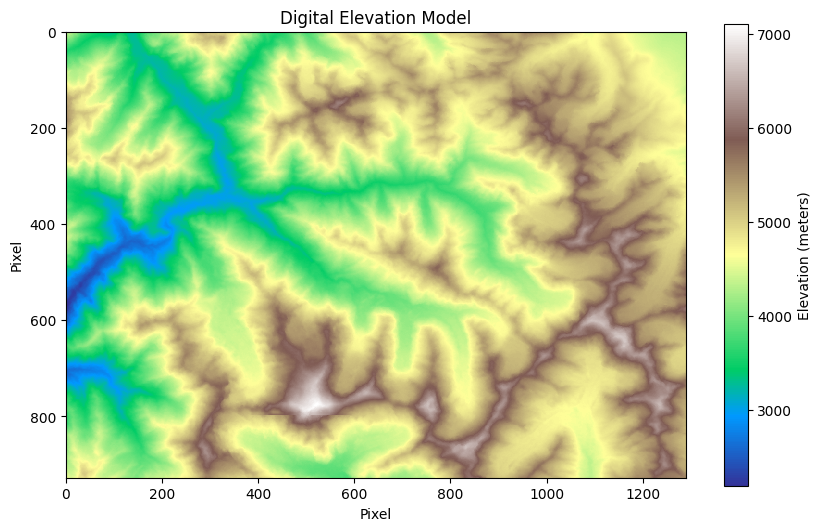

(928, 1290)


In [ ]:
# import rasterio
# import numpy as np
# import matplotlib.pyplot as plt


# with rasterio.open('/content/drive/MyDrive/sampleDEM.tif') as src:

#     dem_array = src.read(1)

#     nodata = src.nodata
#     if nodata is not None:
#         dem_array = np.where(dem_array == nodata, np.nan, dem_array)


# plt.figure(figsize=(10, 6))
# plt.imshow(dem_array, cmap='terrain', interpolation='none')
# plt.colorbar(label='Elevation (meters)')
# plt.title('Digital Elevation Model')
# plt.xlabel('Pixel')
# plt.ylabel('Pixel')
# plt.show()

# print(dem_array.shape)


In [ ]:
# open street map - shape file extraction roads,buildings and hospitals

# image data - X x Y size, * no. of channels, 1 time series data of rainfall,

# pass image in CNN in encoder + vector in MLP layers => concate => decoder and deccoded image size === original image size, 1 channel

# google earth engine - LULC 30m resolution